In [1]:
import pandas as pd

# Load the datasets
w1_position = pd.read_csv('./nfl-big-data-bowl-2024/tracking_week_1.csv')
w2_position = pd.read_csv('./nfl-big-data-bowl-2024/tracking_week_2.csv')
w3_position = pd.read_csv('./nfl-big-data-bowl-2024/tracking_week_3.csv')
w4_position = pd.read_csv('./nfl-big-data-bowl-2024/tracking_week_4.csv')
w5_position = pd.read_csv('./nfl-big-data-bowl-2024/tracking_week_5.csv')
w6_position = pd.read_csv('./nfl-big-data-bowl-2024/tracking_week_6.csv')
w7_position = pd.read_csv('./nfl-big-data-bowl-2024/tracking_week_7.csv')
w8_position = pd.read_csv('./nfl-big-data-bowl-2024/tracking_week_8.csv')
w9_position = pd.read_csv('./nfl-big-data-bowl-2024/tracking_week_9.csv')

# Filter the data to only include information about the football's location
w1_filtered = w1_position[w1_position['displayName'] == 'football']
w2_filtered = w2_position[w2_position['displayName'] == 'football']
w3_filtered = w3_position[w3_position['displayName'] == 'football']
w4_filtered = w4_position[w4_position['displayName'] == 'football']
w5_filtered = w5_position[w5_position['displayName'] == 'football']
w6_filtered = w6_position[w6_position['displayName'] == 'football']
w7_filtered = w7_position[w7_position['displayName'] == 'football']
w8_filtered = w8_position[w8_position['displayName'] == 'football']
w9_filtered = w9_position[w9_position['displayName'] == 'football']

# Sort the tracking data by 'gameId', 'playId', and 'frameId' and reseting the indices
w1_sorted = w1_filtered.sort_values(by=['gameId', 'playId', 'frameId'])
w1_sorted.reset_index(drop=True, inplace=True)

w2_sorted = w2_filtered.sort_values(by=['gameId', 'playId', 'frameId'])
w2_sorted.reset_index(drop=True, inplace=True)

w3_sorted = w3_filtered.sort_values(by=['gameId', 'playId', 'frameId'])
w3_sorted.reset_index(drop=True, inplace=True)

w4_sorted = w4_filtered.sort_values(by=['gameId', 'playId', 'frameId'])
w4_sorted.reset_index(drop=True, inplace=True)

w5_sorted = w5_filtered.sort_values(by=['gameId', 'playId', 'frameId'])
w5_sorted.reset_index(drop=True, inplace=True)

w6_sorted = w6_filtered.sort_values(by=['gameId', 'playId', 'frameId'])
w6_sorted.reset_index(drop=True, inplace=True)

w7_sorted = w7_filtered.sort_values(by=['gameId', 'playId', 'frameId'])
w7_sorted.reset_index(drop=True, inplace=True)

w8_sorted = w8_filtered.sort_values(by=['gameId', 'playId', 'frameId'])
w8_sorted.reset_index(drop=True, inplace=True)

w9_sorted = w9_filtered.sort_values(by=['gameId', 'playId', 'frameId'])
w9_sorted.reset_index(drop=True, inplace=True)

In [2]:
# Concatenate the dataframes vertically
all_weeks_sorted = pd.concat([w1_sorted, w2_sorted, w3_sorted, w4_sorted, w5_sorted, w6_sorted, w7_sorted, w8_sorted, w9_sorted])

# Reset the index for the master dataframe
all_weeks_sorted.reset_index(drop=True, inplace=True)

all_weeks_sorted.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,NaN,football,1,2022-09-08 20:24:05.200000,NaN,football,left,85.050003,33.810001,22.209999,11.850000,2.07,NaN,NaN,NaN
1,2022090800,56,NaN,football,2,2022-09-08 20:24:05.299999,NaN,football,left,83.150002,34.830002,20.900000,13.820000,2.16,NaN,NaN,pass_arrived
2,2022090800,56,NaN,football,3,2022-09-08 20:24:05.400000,NaN,football,left,81.739998,35.590000,19.000000,16.020000,1.60,NaN,NaN,NaN
3,2022090800,56,NaN,football,4,2022-09-08 20:24:05.500000,NaN,football,left,80.139999,36.450001,17.280001,15.400000,1.81,NaN,NaN,NaN
4,2022090800,56,NaN,football,5,2022-09-08 20:24:05.599999,NaN,football,left,79.290001,36.930000,13.360000,20.459999,0.98,NaN,NaN,NaN


In [3]:
# Group by play and calculate start and end positions
ball_movement = all_weeks_sorted.groupby(['gameId', 'playId']).agg(
    x_start=('x', 'first'),
    y_start=('y', 'first'),
    x_end=('x', 'last'),
    y_end=('y', 'last')
).reset_index()

# Filtering data for tackles
tackle_data = all_weeks_sorted[all_weeks_sorted['event'] == 'tackle'][['gameId', 'playId', 'x', 'y']]

# Rename the columns in tackle_data
tackle_data = tackle_data.rename(columns={'x': 'x_tackle', 'y': 'y_tackle'})

# Merge tackle data into ball_movement_summary_df
ball_movement = pd.merge(ball_movement, tackle_data, on=['gameId', 'playId'], how='left')

ball_movement.head()

,gameId,playId,x_start,y_start,x_end,y_end,x_tackle,y_tackle
0,2022090800,56,85.050003,33.810001,78.290001,36.070000,78.160004,36.650002
1,2022090800,80,83.470001,30.459999,72.389999,44.000000,73.129997,42.470001
2,2022090800,101,72.029999,29.530001,64.650002,40.369999,66.389999,40.419998
3,2022090800,122,72.540001,34.490002,59.000000,48.150002,59.860001,47.490002
4,2022090800,146,59.200001,29.299999,57.500000,22.070000,57.889999,22.760000


In [4]:
plays = pd.read_csv('./nfl-big-data-bowl-2024/plays.csv')

# Assuming your dataframes are named all_weeks_sorted and plays
# Merge dataframes based on gameId and playId
merged_df = pd.merge(ball_movement, plays, on=['gameId', 'playId'], how='inner')

# Now merged_df contains the combined information from both dataframes
print(merged_df.shape)
merged_df.head()

(12486, 41)


,gameId,playId,x_start,y_start,x_end,y_end,x_tackle,y_tackle,ballCarrierId,ballCarrierDisplayName,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022090800,56,85.050003,33.810001,78.290001,36.070000,78.160004,36.650002,42489,Stefon Diggs,...,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,NaN,NaN,NaN,NaN
1,2022090800,80,83.470001,30.459999,72.389999,44.000000,73.129997,42.470001,46076,Josh Allen,...,0.413316,0.586684,-0.013497,0.013497,1.303119,0.823571,NaN,NaN,NaN,NaN
2,2022090800,101,72.029999,29.530001,64.650002,40.369999,66.389999,40.419998,47857,Devin Singletary,...,0.399819,0.600181,-0.014850,0.014850,2.126690,0.562363,NaN,NaN,NaN,NaN
3,2022090800,122,72.540001,34.490002,59.000000,48.150002,59.860001,47.490002,47857,Devin Singletary,...,0.384969,0.615031,-0.019032,0.019032,2.689053,0.399209,NaN,NaN,NaN,NaN
4,2022090800,146,59.200001,29.299999,57.500000,22.070000,57.889999,22.760000,47857,Devin Singletary,...,0.365938,0.634062,0.021616,-0.021616,3.088262,-0.514056,NaN,NaN,NaN,NaN


In [6]:
import numpy as np

# Define a function to determine playType based on passResult
def determine_play_type(pass_result):
    if pass_result in ['R', '', np.nan]:
        return 'run'
    else:
        return 'pass'

# Apply the function to create the new 'playType' column
merged_df['playType'] = merged_df['passResult'].apply(determine_play_type)

play_type_counts = merged_df['playType'].value_counts()

print(f"Number of Pass Plays Found: {play_type_counts['pass']}")
print(f"Number of Run Plays Found: {play_type_counts['run']}")
print(merged_df.shape)
merged_df.head()

Number of Pass Plays Found: 5634
Number of Run Plays Found: 6852
(12486, 42)


,gameId,playId,x_start,y_start,x_end,y_end,x_tackle,y_tackle,ballCarrierId,ballCarrierDisplayName,...,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,playType
0,2022090800,56,85.050003,33.810001,78.290001,36.070000,78.160004,36.650002,42489,Stefon Diggs,...,0.586653,-0.000031,0.000031,1.298699,0.004420,NaN,NaN,NaN,NaN,pass
1,2022090800,80,83.470001,30.459999,72.389999,44.000000,73.129997,42.470001,46076,Josh Allen,...,0.586684,-0.013497,0.013497,1.303119,0.823571,NaN,NaN,NaN,NaN,run
2,2022090800,101,72.029999,29.530001,64.650002,40.369999,66.389999,40.419998,47857,Devin Singletary,...,0.600181,-0.014850,0.014850,2.126690,0.562363,NaN,NaN,NaN,NaN,run
3,2022090800,122,72.540001,34.490002,59.000000,48.150002,59.860001,47.490002,47857,Devin Singletary,...,0.615031,-0.019032,0.019032,2.689053,0.399209,NaN,NaN,NaN,NaN,pass
4,2022090800,146,59.200001,29.299999,57.500000,22.070000,57.889999,22.760000,47857,Devin Singletary,...,0.634062,0.021616,-0.021616,3.088262,-0.514056,NaN,NaN,NaN,NaN,run


In [8]:
# Calculate and create delta_x and delta_y
merged_df['delta_x'] = abs(merged_df['x_tackle'] - merged_df['x_start'])
merged_df['delta_y'] = merged_df['y_tackle'] - merged_df['y_start']

merged_df.head()

,gameId,playId,x_start,y_start,x_end,y_end,x_tackle,y_tackle,ballCarrierId,ballCarrierDisplayName,...,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,playType,delta_x,delta_y
0,2022090800,56,85.050003,33.810001,78.290001,36.070000,78.160004,36.650002,42489,Stefon Diggs,...,0.000031,1.298699,0.004420,NaN,NaN,NaN,NaN,pass,6.889999,2.840000
1,2022090800,80,83.470001,30.459999,72.389999,44.000000,73.129997,42.470001,46076,Josh Allen,...,0.013497,1.303119,0.823571,NaN,NaN,NaN,NaN,run,10.340004,12.010002
2,2022090800,101,72.029999,29.530001,64.650002,40.369999,66.389999,40.419998,47857,Devin Singletary,...,0.014850,2.126690,0.562363,NaN,NaN,NaN,NaN,run,5.639999,10.889997
3,2022090800,122,72.540001,34.490002,59.000000,48.150002,59.860001,47.490002,47857,Devin Singletary,...,0.019032,2.689053,0.399209,NaN,NaN,NaN,NaN,pass,12.680000,13.000000
4,2022090800,146,59.200001,29.299999,57.500000,22.070000,57.889999,22.760000,47857,Devin Singletary,...,-0.021616,3.088262,-0.514056,NaN,NaN,NaN,NaN,run,1.310001,-6.539999


In [10]:
# Selecting the desired columns
selected_columns = ['gameId', 'playId', 'x_start', 'y_start', 'x_end', 'y_end', 'x_tackle', 'y_tackle', 'offenseFormation', 'playType', 'delta_x', 'delta_y', 'possessionTeam']

# Keep only the selected columns in the DataFrame
merged_df = merged_df.loc[:, selected_columns]

merged_df.shape
merged_df.head()

,gameId,playId,x_start,y_start,x_end,y_end,x_tackle,y_tackle,offenseFormation,playType,delta_x,delta_y,possessionTeam
0,2022090800,56,85.050003,33.810001,78.290001,36.070000,78.160004,36.650002,SHOTGUN,pass,6.889999,2.840000,BUF
1,2022090800,80,83.470001,30.459999,72.389999,44.000000,73.129997,42.470001,EMPTY,run,10.340004,12.010002,BUF
2,2022090800,101,72.029999,29.530001,64.650002,40.369999,66.389999,40.419998,I_FORM,run,5.639999,10.889997,BUF
3,2022090800,122,72.540001,34.490002,59.000000,48.150002,59.860001,47.490002,SHOTGUN,pass,12.680000,13.000000,BUF
4,2022090800,146,59.200001,29.299999,57.500000,22.070000,57.889999,22.760000,SHOTGUN,run,1.310001,-6.539999,BUF


In [11]:
unique_formations = merged_df['offenseFormation'].unique()
print(unique_formations)

['SHOTGUN' 'EMPTY' 'I_FORM' 'SINGLEBACK' 'PISTOL' 'JUMBO' 'WILDCAT' nan]


In [12]:
# Check for missing values in delta_x and delta_y
print(merged_df['delta_x'].isnull().sum())
print(merged_df['delta_y'].isnull().sum())

2464
2464


In [13]:
# Drop rows with missing values
merged_df = merged_df.dropna(subset=['delta_x', 'delta_y'])

# Fill missing values with a specific value (e.g., mean)
merged_df['delta_x'].fillna(merged_df['delta_x'].mean(), inplace=True)
merged_df['delta_y'].fillna(merged_df['delta_y'].mean(), inplace=True)

merged_df.head()

,gameId,playId,x_start,y_start,x_end,y_end,x_tackle,y_tackle,offenseFormation,playType,delta_x,delta_y,possessionTeam
0,2022090800,56,85.050003,33.810001,78.290001,36.070000,78.160004,36.650002,SHOTGUN,pass,6.889999,2.840000,BUF
1,2022090800,80,83.470001,30.459999,72.389999,44.000000,73.129997,42.470001,EMPTY,run,10.340004,12.010002,BUF
2,2022090800,101,72.029999,29.530001,64.650002,40.369999,66.389999,40.419998,I_FORM,run,5.639999,10.889997,BUF
3,2022090800,122,72.540001,34.490002,59.000000,48.150002,59.860001,47.490002,SHOTGUN,pass,12.680000,13.000000,BUF
4,2022090800,146,59.200001,29.299999,57.500000,22.070000,57.889999,22.760000,SHOTGUN,run,1.310001,-6.539999,BUF


In [14]:
# Fist Model instance

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Assuming merged_df has features 'offenseFormation', 'delta_x', 'delta_y', 'playType'
X = merged_df[['offenseFormation', 'playType']]
y = merged_df['delta_x']  # Only predict delta_x

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor to one-hot encode 'offenseFormation' and 'playType'
preprocessor = ColumnTransformer(
    transformers=[
        ('offenseFormation', OneHotEncoder(), ['offenseFormation']),
        ('playType', OneHotEncoder(), ['playType'])
    ],
    remainder='passthrough'
)

# Apply the preprocessor to X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert sparse matrices to dense NumPy arrays
X_train_processed = np.array(X_train_processed.toarray())
X_test_processed = np.array(X_test_processed.toarray())

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # 1 output node for delta_x
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_processed, y_test)
print(f'Mean Absolute Error on Test Data: {mae}')


Epoch 1/50
126/201 [=================>............] - ETA: 0s - loss: 46.5303 - mae: 4.5141 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


201/201 [==============================] - 0s 740us/step - loss: 42.7586 - mae: 4.3336 - val_loss: 33.0921 - val_mae: 4.0939
Epoch 2/50
201/201 [==============================] - 0s 461us/step - loss: 33.2215 - mae: 3.8322 - val_loss: 32.9815 - val_mae: 4.0497
Epoch 3/50
201/201 [==============================] - 0s 457us/step - loss: 33.1330 - mae: 3.8386 - val_loss: 33.1241 - val_mae: 3.9849
Epoch 4/50
201/201 [==============================] - 0s 451us/step - loss: 33.2026 - mae: 3.8257 - val_loss: 32.9555 - val_mae: 3.9805
Epoch 5/50
201/201 [==============================] - 0s 447us/step - loss: 33.1438 - mae: 3.8334 - val_loss: 32.9447 - val_mae: 3.9689
Epoch 6/50
201/201 [==============================] - 0s 453us/step - loss: 33.1412 - mae: 3.8259 - val_loss: 32.9452 - val_mae: 3.9705
Epoch 7/50
201/201 [==============================] - 0s 453us/step - loss: 33.1545 - mae: 3.8242 - val_loss: 32.9489 - val_mae: 3.9744
Epoch 8/50
201/201 [==============================] - 0s 44

In [15]:
# Model for Delta_X Coordinate Prediction

import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

class PredictPlayOutcome_MLP_X:
    def __init__(self, data):
        self.data = data
        self.model = None  # Model will be initialized when needed

    def train_model(self, X, y, epochs=50, batch_size=32, validation_split=0.2):
        # Define the preprocessor to one-hot encode 'offenseFormation' and 'playType'
        preprocessor = ColumnTransformer(
            transformers=[
                ('offenseFormation', OneHotEncoder(), ['offenseFormation']),
                ('playType', OneHotEncoder(), ['playType'])
            ],
            remainder='passthrough'
        )

        # Apply the preprocessor to X
        X_processed = preprocessor.fit_transform(X)

        # Convert sparse matrix to dense NumPy array
        X_processed = np.array(X_processed.toarray())

        # Build the model
        self.model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(X_processed.shape[1],)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)  # 1 output node for delta_x
        ])

        # Compile the model
        self.model.compile(optimizer='adam', loss='mse', metrics=['mae'])

        # Train the model
        self.model.fit(X_processed, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    def predict_delta_x(self, offense_formation, play_type):
        if self.model is None:
            print("Model not trained. Please train the model first.")
            return None

        # Filter data based on offenseFormation and playType
        filtered_data = self.data[(self.data['offenseFormation'] == offense_formation) & (self.data['playType'] == play_type)]

        # If there's no data for the specified conditions, return None
        if filtered_data.empty:
            print(f"No data for offenseFormation: {offense_formation} and playType: {play_type}.")
            return None

        # Prepare input features for prediction
        X_input = filtered_data[['offenseFormation', 'playType']]

        # Apply the preprocessor to X_input
        X_input_processed = preprocessor.transform(X_input)

        # Convert sparse matrix to dense NumPy array
        X_input_processed = np.array(X_input_processed.toarray())

        # Make the prediction
        predictions = self.model.predict(X_input_processed)

        # Take the mean prediction
        mean_delta_x_prediction = np.mean(predictions)

        # Evaluate the model on the test data
        X_test_processed = preprocessor.transform(X_test)
        X_test_processed = np.array(X_test_processed.toarray())
        y_test_predictions = self.model.predict(X_test_processed)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_test_predictions)
        mae = mean_absolute_error(y_test, y_test_predictions)
        r2 = r2_score(y_test, y_test_predictions)

        print(f'MSE: {mse:.3f}')
        print(f'MAE: {mae:.3f}')
        print(f'R^2: {r2:.3f}')

        return mean_delta_x_prediction

# Example usage:
predictor = PredictPlayOutcome_MLP_X(merged_df)
predictor.train_model(X_train, y_train)  # Make sure to train the model before using predictions
delta_x_result = predictor.predict_delta_x('SHOTGUN', 'run')
print(f'Delta_X Prediction for SHOTGUN run play: {delta_x_result}')


Epoch 1/50
115/201 [================>.............] - ETA: 0s - loss: 41.9964 - mae: 4.3488 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


201/201 [==============================] - 0s 760us/step - loss: 39.7995 - mae: 4.1845 - val_loss: 33.5441 - val_mae: 3.8814
Epoch 2/50
201/201 [==============================] - 0s 540us/step - loss: 33.2521 - mae: 3.8234 - val_loss: 32.9104 - val_mae: 3.9816
Epoch 3/50
201/201 [==============================] - 0s 531us/step - loss: 33.1979 - mae: 3.8338 - val_loss: 33.0244 - val_mae: 3.9575
Epoch 4/50
201/201 [==============================] - 0s 530us/step - loss: 33.2644 - mae: 3.8330 - val_loss: 32.9056 - val_mae: 3.9696
Epoch 5/50
201/201 [==============================] - 0s 540us/step - loss: 33.1418 - mae: 3.8295 - val_loss: 33.1218 - val_mae: 4.0658
Epoch 6/50
201/201 [==============================] - 0s 541us/step - loss: 33.2511 - mae: 3.8249 - val_loss: 33.3197 - val_mae: 3.8977
Epoch 7/50
201/201 [==============================] - 0s 540us/step - loss: 33.2586 - mae: 3.8307 - val_loss: 32.8568 - val_mae: 4.0087
Epoch 8/50
201/201 [==============================] - 0s 53

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Practically Useful Model for Y Coordinate Result

class PredictPlayOutcome_MLP_Y:
    def __init__(self, data):
        self.data = data
        self.model = None  # Model will be initialized when needed

    def train_model(self, X, y, epochs=50, batch_size=32, validation_split=0.2):
        # Define the preprocessor to one-hot encode 'offenseFormation' and 'playType'
        preprocessor = ColumnTransformer(
            transformers=[
                ('offenseFormation', OneHotEncoder(), ['offenseFormation']),
                ('playType', OneHotEncoder(), ['playType'])
            ],
            remainder='passthrough'
        )

        # Apply the preprocessor to X
        X_processed = preprocessor.fit_transform(X)

        # Convert sparse matrix to dense NumPy array
        X_processed = np.array(X_processed.toarray())

        # Build the model
        self.model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(X_processed.shape[1],)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)  # 1 output node for delta_y
        ])

        # Compile the model
        self.model.compile(optimizer='adam', loss='mse', metrics=['mae'])

        # Train the model
        self.model.fit(X_processed, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    def predict_delta_y(self, offense_formation, play_type):
        if self.model is None:
            print("Model not trained. Please train the model first.")
            return None

        # Filter data based on offenseFormation and playType
        filtered_data = self.data[(self.data['offenseFormation'] == offense_formation) & (self.data['playType'] == play_type)]

        # If there's no data for the specified conditions, return None
        if filtered_data.empty:
            print(f"No data for offenseFormation: {offense_formation} and playType: {play_type}.")
            return None

        # Prepare input features for prediction
        X_input = filtered_data[['offenseFormation', 'playType']]

        # Apply the preprocessor to X_input
        X_input_processed = preprocessor.transform(X_input)

        # Convert sparse matrix to dense NumPy array
        X_input_processed = np.array(X_input_processed.toarray())

        # Make the prediction
        predictions = self.model.predict(X_input_processed)

        # Take the mean prediction
        mean_delta_y_prediction = np.mean(predictions)

        # Evaluate the model on the test data
        X_test_processed = preprocessor.transform(X_test)
        X_test_processed = np.array(X_test_processed.toarray())
        y_test_predictions = self.model.predict(X_test_processed)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_test_predictions)
        mae = mean_absolute_error(y_test, y_test_predictions)
        r2 = r2_score(y_test, y_test_predictions)

        print(f'MSE: {mse:.3f}')
        print(f'MAE: {mae:.3f}')
        print(f'R^2: {r2:.3f}')

        return mean_delta_y_prediction

# Example usage:

y = merged_df['delta_y']
predictor_y = PredictPlayOutcome_MLP_Y(merged_df)
predictor_y.train_model(X_train, y)  # Make sure to train the model before using predictions
delta_y_result = predictor_y.predict_delta_y('SHOTGUN', 'run')
print(f'Delta_Y Prediction for SHOTGUN run play: {delta_y_result}')


Epoch 1/50
111/201 [===============>..............] - ETA: 0s - loss: 91.5709 - mae: 7.3255 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


201/201 [==============================] - 0s 1ms/step - loss: 90.8045 - mae: 7.2991 - val_loss: 87.4851 - val_mae: 7.1962
Epoch 2/50
201/201 [==============================] - 0s 562us/step - loss: 90.7509 - mae: 7.2973 - val_loss: 87.5167 - val_mae: 7.1982
Epoch 3/50
201/201 [==============================] - 0s 539us/step - loss: 90.7524 - mae: 7.2969 - val_loss: 87.4771 - val_mae: 7.1963
Epoch 4/50
201/201 [==============================] - 0s 535us/step - loss: 90.7283 - mae: 7.2961 - val_loss: 87.4596 - val_mae: 7.1963
Epoch 5/50
201/201 [==============================] - 0s 536us/step - loss: 90.7063 - mae: 7.2960 - val_loss: 87.4661 - val_mae: 7.2009
Epoch 6/50
201/201 [==============================] - 0s 534us/step - loss: 90.7215 - mae: 7.2978 - val_loss: 87.4823 - val_mae: 7.1993
Epoch 7/50
201/201 [==============================] - 0s 555us/step - loss: 90.6909 - mae: 7.2957 - val_loss: 87.4726 - val_mae: 7.1985
Epoch 8/50
201/201 [==============================] - 0s 594u

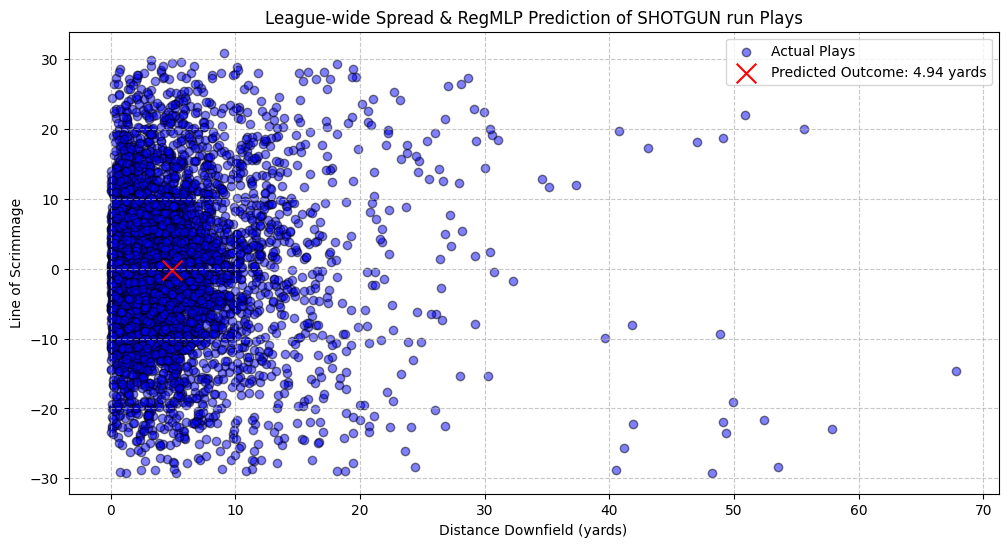

In [17]:
import matplotlib.pyplot as plt

def map_delta_to_field(offenseFormation, playType, delta_x_result, delta_y_result, filtered_data):
    # Filter data based on offenseFormation
    filtered_data = merged_df[merged_df['offenseFormation'] == offenseFormation]
    filtered_data = merged_df[merged_df['playType'] == playType]

    # Plot the football field graphic
    plt.figure(figsize=(12, 6))
    plt.scatter(filtered_data['delta_x'], filtered_data['delta_y'], alpha=0.5, color='blue', edgecolors='black', label='Actual Plays')
    plt.scatter(delta_x_result, delta_y_result, alpha=1.0, s=200, color='red', marker='x', label=(f'Predicted Outcome: {delta_x_result:.2f} yards'))
    plt.title(f'League-wide Spread & RegMLP Prediction of {offenseFormation} {playType} Plays')
    plt.xlabel('Distance Downfield (yards)')
    plt.ylabel('Line of Scrimmage')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best')

    plt.show()

# Example usage:
map_delta_to_field('SHOTGUN', 'run', delta_x_result, delta_y_result, merged_df)

FPS of BUF SHOTGUN run Plays: 46.25%


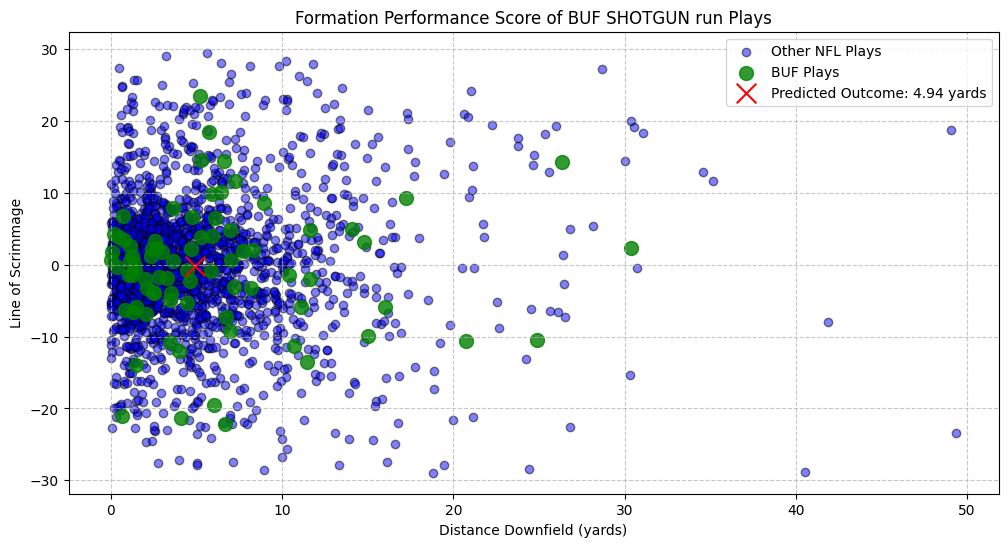

In [18]:
import matplotlib.pyplot as plt

def map_FPS(offenseFormation, playType, delta_x_result, delta_y_result, filtered_data, offenseTeam=None):
    # Filter data based on offenseFormation and playType
    filtered_data = filtered_data[(filtered_data['offenseFormation'] == offenseFormation) & (filtered_data['playType'] == playType)]

    # If offenseTeam is specified, highlight data points for that team
    if offenseTeam:
        team_data = filtered_data[filtered_data['possessionTeam'] == offenseTeam]
        other_data = filtered_data[filtered_data['possessionTeam'] != offenseTeam]

        # Plot the football field graphic
        plt.figure(figsize=(12, 6))
        plt.scatter(other_data['delta_x'], other_data['delta_y'], alpha=0.5, color='blue', edgecolors='black', label='Other NFL Plays')
        plt.scatter(team_data['delta_x'], team_data['delta_y'], alpha=0.8, s=100, color='green', label=f'{offenseTeam} Plays')

    else:
        # Plot the football field graphic without highlighting a specific team
        plt.figure(figsize=(12, 6))
        plt.scatter(filtered_data['delta_x'], filtered_data['delta_y'], alpha=0.5, color='blue', edgecolors='black', label='Actual Plays')

    # Plot the predicted outcome
    plt.scatter(delta_x_result, delta_y_result, alpha=1.0, s=200, color='red', marker='x', label=(f'Predicted Outcome: {delta_x_result:.2f} yards'))

    # Calculate and print the percentage of offenseTeam plays with x-coordinate values greater than delta_x_result
    if offenseTeam:
        percentage_greater_than_predicted = (team_data['delta_x'] > delta_x_result).mean() * 100
        print(f'FPS of {offenseTeam} {offenseFormation} {playType} Plays: {percentage_greater_than_predicted:.2f}%')

    # Set plot properties
    plt.title(f'Formation Performance Score of {offenseTeam} {offenseFormation} {playType} Plays')
    plt.xlabel('Distance Downfield (yards)')
    plt.ylabel('Line of Scrimmage')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best')

    plt.show()

# Example usage:
map_FPS('SHOTGUN', 'run', delta_x_result, delta_y_result, merged_df, offenseTeam='BUF')
